In [1]:
#Absenteeism at work

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read data 
# downloaded here https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work
df = pd.read_csv("Absenteeism_at_work.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


I. Who took part in this study?

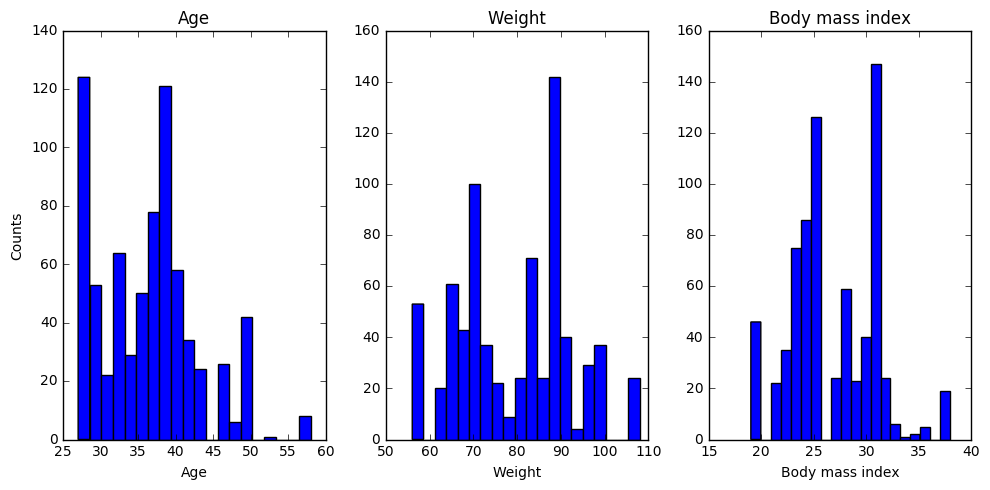

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='blue')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Counts')

plt.subplot(1, 3, 2)
plt.hist(df['Weight'], bins=20, color='blue')
plt.title('Weight')
plt.xlabel('Weight')


plt.subplot(1, 3, 3)
plt.hist(df['Body mass index'], bins=20, color='blue')
plt.title('Body mass index')
plt.xlabel('Body mass index')


plt.tight_layout()
plt.show()

The majority of participants was between 28 and 40 years old.
There are two peaks of weight at 70 and 90.
The BMI of participants peaked at 25 and at 32.

II. Is there be a particular day of the week on which people are longer absent from work?

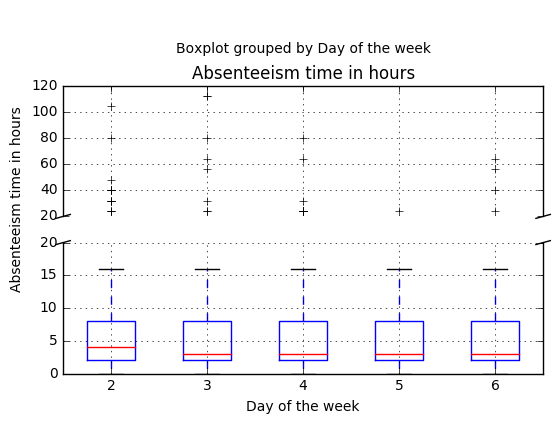

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
df.boxplot(column='Absenteeism time in hours', by='Day of the week', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Absenteeism time in hours                      ')
ax1.set_ylim(ymin=20)

df.boxplot(column='Absenteeism time in hours', by='Day of the week', ax=ax2)
ax2.set_title('')
ax2.set_ylim(ymax=20)
fig.subplots_adjust(top=0.87)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()

The mean duration of absence on day2 of the week is a little bit higher than any other day.

III. What is the most common reason for being absent?

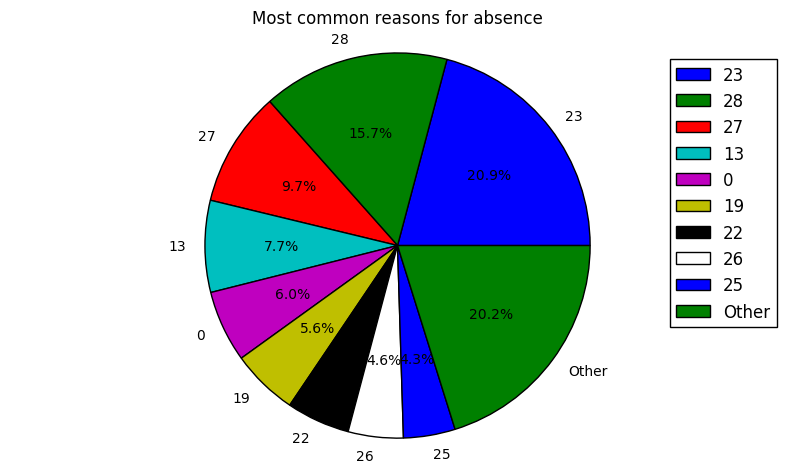

In [6]:
dfnew = df.groupby('Reason for absence').count()
dfnew['freq'] = dfnew['ID']
data= dfnew['freq']
data = data.sort_values(ascending=False)


other = int(data[10:].sum())
#print(other)
data = data[:10]
#print(data)
data.loc[11] = other
data = data.rename(index={11: 'Other'})
data = data.to_frame()
data.head()

labels= data.index.tolist()
#print(labels)

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(data.freq, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Most common reasons for absence\n')
#colormap(spring)
plt.legend(data.index)

Most common reasons for absence are 23 (Medical consultation) and 28 (Dental consultation).

IV. Are people with a higher BMI longer absent?

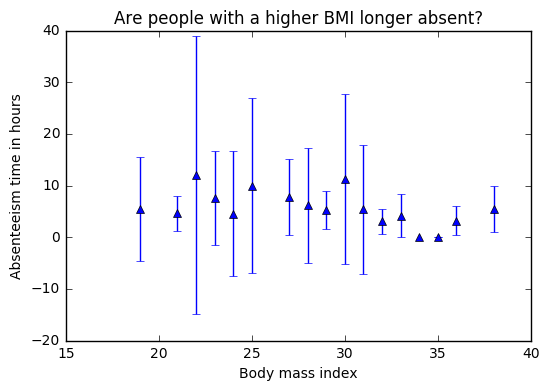

In [7]:
data = df[['Body mass index', 'Absenteeism time in hours']]

BMIdata_mean= data.groupby('Body mass index').mean()
BMIdata_mean = BMIdata_mean.reset_index()

BMIdata_sd = data.groupby('Body mass index').std()

plt.errorbar(BMIdata_mean['Body mass index'],BMIdata_mean['Absenteeism time in hours'] ,BMIdata_sd['Absenteeism time in hours'] , linestyle='None', marker='^')
plt.xlabel('Body mass index')
plt.ylabel('Absenteeism time in hours')
plt.title('Are people with a higher BMI longer absent?')
plt.show()

The mean duration of absence is higher for people with an BMI between 22 to 31, but is lower again at BMIs higher than 31. 

Are people with longer commutes to work, londer absent?

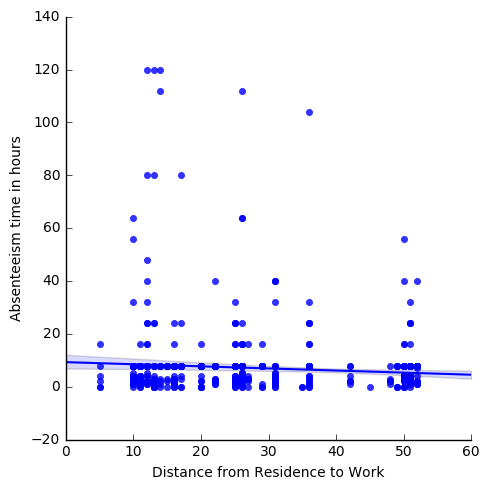

In [11]:
sns.lmplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=df)

No, the distance to work people have to commute does not impact the duration of absenteeism.